In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
ASC = pd.read_csv('provider_ASC.csv', dtype={'ZIP': 'str','npi':'str'})
ASC.head(1)

,npi,np_last_orgname,np_entity_code,np_city,np_state,p_type,place_of_service,HCPCS,hcpcs_description,unique_beneficiary,bene_day_srvc_cnt,avg_medicare_allowed,avg_medicare_pymt,ZIP
0,1003015843,"NORTHBAY PHYSICIAN'S SURGERY CENTER, L.L.C.",O,VACAVILLE,CA,Ambulatory Surgical Center,F,0191T,Internal insertion of eye fluid drainage device,11,13,3042.237692,2385.113846,95687


In [3]:
ASC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57329 entries, 0 to 57328
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   npi                   57329 non-null  object 
 1   np_last_orgname       57329 non-null  object 
 2   np_entity_code        57329 non-null  object 
 3   np_city               57329 non-null  object 
 4   np_state              57329 non-null  object 
 5   p_type                57329 non-null  object 
 6   place_of_service      57329 non-null  object 
 7   HCPCS                 57329 non-null  object 
 8   hcpcs_description     57329 non-null  object 
 9   unique_beneficiary    57329 non-null  int64  
 10  bene_day_srvc_cnt     57329 non-null  int64  
 11  avg_medicare_allowed  57329 non-null  float64
 12  avg_medicare_pymt     57329 non-null  float64
 13  ZIP                   57329 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 6.1+ MB


In [4]:
ASC.to_csv('ASC.csv', index=False)

In [5]:
crosswalk = pd.read_csv('hcpcs_apc.csv', dtype = 'str')
crosswalk.head(1)

,hcpcs_code,APC
0,10005,5071


In [6]:
CBSA =pd.read_csv('zip_cbsa.csv', dtype='str')
CBSA.head()

,CBSA,zip
0,35620,00501
1,38660,00601
2,10380,00602
3,10380,00603
4,10380,00604


In [7]:
cbsa_35620=CBSA[CBSA.CBSA == '35620']
cbsa_35620_list = cbsa_35620['zip'].tolist()

In [8]:
ASC_crosswalk_combined = pd.merge(ASC, crosswalk, how = 'left', left_on= 'HCPCS' , right_on ='hcpcs_code')
ASC_crosswalk_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57329 entries, 0 to 57328
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   npi                   57329 non-null  object 
 1   np_last_orgname       57329 non-null  object 
 2   np_entity_code        57329 non-null  object 
 3   np_city               57329 non-null  object 
 4   np_state              57329 non-null  object 
 5   p_type                57329 non-null  object 
 6   place_of_service      57329 non-null  object 
 7   HCPCS                 57329 non-null  object 
 8   hcpcs_description     57329 non-null  object 
 9   unique_beneficiary    57329 non-null  int64  
 10  bene_day_srvc_cnt     57329 non-null  int64  
 11  avg_medicare_allowed  57329 non-null  float64
 12  avg_medicare_pymt     57329 non-null  float64
 13  ZIP                   57329 non-null  object 
 14  hcpcs_code            56484 non-null  object 
 15  APC                

In [9]:
ASC_crosswalk_combined.to_csv('ASC_crosswalk_combined.csv', index=False)

In [10]:
ASC_crosswalk_CBSA = pd.merge(ASC_crosswalk_combined,CBSA, how ='left', left_on = 'ZIP', right_on = 'zip',copy=False)
ASC_crosswalk_CBSA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62815 entries, 0 to 62814
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   npi                   62815 non-null  object 
 1   np_last_orgname       62815 non-null  object 
 2   np_entity_code        62815 non-null  object 
 3   np_city               62815 non-null  object 
 4   np_state              62815 non-null  object 
 5   p_type                62815 non-null  object 
 6   place_of_service      62815 non-null  object 
 7   HCPCS                 62815 non-null  object 
 8   hcpcs_description     62815 non-null  object 
 9   unique_beneficiary    62815 non-null  int64  
 10  bene_day_srvc_cnt     62815 non-null  int64  
 11  avg_medicare_allowed  62815 non-null  float64
 12  avg_medicare_pymt     62815 non-null  float64
 13  ZIP                   62815 non-null  object 
 14  hcpcs_code            61891 non-null  object 
 15  APC                

In [11]:
ASC_crosswalk_CBSA[(ASC_crosswalk_CBSA.np_state =='NY') & (ASC_crosswalk_CBSA.APC == '5114') ]

,npi,np_last_orgname,np_entity_code,np_city,np_state,p_type,place_of_service,HCPCS,hcpcs_description,unique_beneficiary,bene_day_srvc_cnt,avg_medicare_allowed,avg_medicare_pymt,ZIP,hcpcs_code,APC,CBSA,zip
2680,1043246077,DUTCHESS AMBULATORY SURGICAL CENTER,O,POUGHKEEPSIE,NY,Ambulatory Surgical Center,F,28299,Correction of bunion,12,15,1127.221333,883.740000,12603,28299,5114,39100,12603
3987,1063427706,PROHEALTH AMBULATORY SURGERY CENTER INC,O,NEW HYDE PARK,NY,Ambulatory Surgical Center,F,29827,Repair of shoulder rotator cuff using an endos...,23,23,2878.288696,2254.635217,11042,29827,5114,35620,11042
16360,1255675062,BROOKLYN SC LLC,O,BROOKLYN,NY,Ambulatory Surgical Center,F,29827,Repair of shoulder rotator cuff using an endos...,27,27,2808.094815,2195.171111,11204,29827,5114,35620,11204
16834,1265495451,EXECUTIVE WOODS AMBULATORY SURGERY CENTER LLC,O,ALBANY,NY,Ambulatory Surgical Center,F,29827,Repair of shoulder rotator cuff using an endos...,60,61,2295.992295,1792.123934,12205,29827,5114,10580,12205
27772,1427282771,UPSTATE ORTHOPEDICS AMBULATORY SURGERY CENTER LLC,O,EAST SYRACUSE,NY,Ambulatory Surgical Center,F,29827,Repair of shoulder rotator cuff using an endos...,13,13,2130.450000,1667.436923,13057,29827,5114,45060,13057
32336,1508005976,"SOUTH SHORE SC, LLC",O,BAY SHORE,NY,Ambulatory Surgical Center,F,0275T,Removal of bone from lower spine for decompres...,12,14,3009.120000,2359.150000,11706,0275T,5114,35620,11706
32337,1508005976,"SOUTH SHORE SC, LLC",O,BAY SHORE,NY,Ambulatory Surgical Center,F,29827,Repair of shoulder rotator cuff using an endos...,15,15,3009.120000,2349.434000,11706,29827,5114,35620,11706
32845,1508863242,BUFFALO SURGERY CENTER LLC,O,AMHERST,NY,Ambulatory Surgical Center,F,29827,Repair of shoulder rotator cuff using an endos...,27,28,2718.160000,2062.176786,14226,29827,5114,15380,14226
33337,1518323435,SOUTHTOWNS SURGERY CENTER LLC,O,ORCHARD PARK,NY,Ambulatory Surgical Center,F,29827,Repair of shoulder rotator cuff using an endos...,12,13,2576.853846,2020.255385,14127,29827,5114,15380,14127
34796,1538276688,MELVILLE SC LLC,O,MELVILLE,NY,Ambulatory Surgical Center,F,29827,Repair of shoulder rotator cuff using an endos...,43,45,2908.816000,2280.512000,11747,29827,5114,35620,11747


In [12]:
ASC_crosswalk_combined_df =pd.DataFrame(ASC_crosswalk_combined)

In [13]:
ASC_crosswalk_CBSA.notnull().sum()

npi                     62815
np_last_orgname         62815
np_entity_code          62815
np_city                 62815
np_state                62815
p_type                  62815
place_of_service        62815
HCPCS                   62815
hcpcs_description       62815
unique_beneficiary      62815
bene_day_srvc_cnt       62815
avg_medicare_allowed    62815
avg_medicare_pymt       62815
ZIP                     62815
hcpcs_code              61891
APC                     61891
CBSA                    62815
zip                     62815
dtype: int64

In [14]:
ASC_crosswalk_CBSA_drop =ASC_crosswalk_CBSA.dropna()

In [15]:
ASC_crosswalk_CBSA_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61891 entries, 0 to 62814
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   npi                   61891 non-null  object 
 1   np_last_orgname       61891 non-null  object 
 2   np_entity_code        61891 non-null  object 
 3   np_city               61891 non-null  object 
 4   np_state              61891 non-null  object 
 5   p_type                61891 non-null  object 
 6   place_of_service      61891 non-null  object 
 7   HCPCS                 61891 non-null  object 
 8   hcpcs_description     61891 non-null  object 
 9   unique_beneficiary    61891 non-null  int64  
 10  bene_day_srvc_cnt     61891 non-null  int64  
 11  avg_medicare_allowed  61891 non-null  float64
 12  avg_medicare_pymt     61891 non-null  float64
 13  ZIP                   61891 non-null  object 
 14  hcpcs_code            61891 non-null  object 
 15  APC                

# Find APC=5114 related HCPCS in Provider dataFrame ASC_crosswalk_combined. There're 1413 HCPCS.


In [16]:
physician_5114 =ASC_crosswalk_combined[(ASC_crosswalk_combined['APC']=='5114')]
physician_5114.shape

(1413, 16)

### Find provider/Physicians in CBSA 35620 for APC 5114

In [17]:
physician_5114_CBSA_35620 = physician_5114[physician_5114.ZIP.isin(cbsa_35620_list)]
physician_5114_CBSA_35620.shape

(25, 16)

In [18]:
physician_5114_CBSA_35620.duplicated()

741      False
1186     False
3678     False
11590    False
13710    False
15009    False
16001    False
19619    False
19620    False
27089    False
29495    False
29496    False
31725    False
34501    False
37744    False
37745    False
38110    False
38115    False
38911    False
45122    False
46063    False
48176    False
48430    False
48939    False
49977    False
dtype: bool

In [19]:
physician_5114_CBSA_35620.avg_medicare_allowed.agg(['max','min','mean'])

max     4176.550000
min     1750.336923
mean    2902.087683
Name: avg_medicare_allowed, dtype: float64

### Find provider/Physicians in CBSA 35620 for APC 5113

In [24]:
physician_5113 =ASC_crosswalk_combined[(ASC_crosswalk_combined['APC']=='5113')]
physician_5113.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4185 entries, 2 to 57218
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   npi                   4185 non-null   object 
 1   np_last_orgname       4185 non-null   object 
 2   np_entity_code        4185 non-null   object 
 3   np_city               4185 non-null   object 
 4   np_state              4185 non-null   object 
 5   p_type                4185 non-null   object 
 6   place_of_service      4185 non-null   object 
 7   HCPCS                 4185 non-null   object 
 8   hcpcs_description     4185 non-null   object 
 9   unique_beneficiary    4185 non-null   int64  
 10  bene_day_srvc_cnt     4185 non-null   int64  
 11  avg_medicare_allowed  4185 non-null   float64
 12  avg_medicare_pymt     4185 non-null   float64
 13  ZIP                   4185 non-null   object 
 14  hcpcs_code            4185 non-null   object 
 15  APC                 

In [33]:
#filter zip codes in physician dataframe
physician_5113_zip=physician_5113.ZIP.unique()
physician_5113_zip_list=physician_5113_zip.tolist()

In [40]:
physician_5113_CBSA_35620 = physician_5113[physician_5113.ZIP.isin(cbsa_35620_list)]
physician_5113_CBSA_35620.shape

(143, 16)

In [42]:
#check if physician_5113_zip_list has related CBSA

CBSA_5113=CBSA[CBSA.zip.isin(physician_5113_zip_list)]
CBSA_35620_APC_5113_df =CBSA_5113[CBSA_5113.CBSA=='35620']

In [67]:
CBSA_5113=CBSA[CBSA.zip.isin(physician_5113_zip_list)]
CBSA_5113

,CBSA,zip
133,41980,00909
268,44140,01104
271,44140,01107
448,49340,01605
565,14460,01960
...,...,...
47118,28420,99336
47136,28420,99352
47145,47460,99362
47161,11260,99508


In [44]:
#combined physicians and other supplier(non-hospital) that has APC 5113 and CBSA 35620 for NY, NJ states
physician_5113_CBSA_35620_combined=pd.merge(physician_5113,CBSA_35620_APC_5113_df, how ='inner', left_on = 'ZIP', right_on = 'zip')
physician_5113_CBSA_35620_combined.shape

(143, 18)

In [47]:
#filter hcpcs 29881 in physicians and other supplier(non-hospital) dataset that has related APC 5113
hcpcs_29881=physician_5113_CBSA_35620_combined[physician_5113_CBSA_35620_combined.HCPCS == '29881']
hcpcs_29881.shape

(29, 18)

In [87]:
hcpcs_29881.to_csv('PROVIDER_HCPCS_29881_APC_5113.csv', index=False)

In [69]:
#combined physicians and other supplier(non-hospital) that has APC 5113 and all CBSA
physician_5113_CBSA_combined=pd.merge(physician_5113,CBSA_5113, how ='inner', left_on = 'ZIP', right_on = 'zip')
physician_5113_CBSA_combined.shape

(4569, 18)

In [70]:
physician_5113_CBSA_combined.groupby('CBSA').avg_medicare_allowed.agg(['max','min','mean'])

,max,min,mean
CBSA,,,
10180,1110.330000,555.170000,789.748530
10420,1122.400000,561.200000,857.314150
10460,1127.040000,158.112273,747.470941
10500,816.695484,816.695484,816.695484
10540,1118.252308,680.679231,899.465769
...,...,...,...
49620,1181.730000,256.571429,841.408009
49660,1086.920000,557.761579,828.586785
49700,1177.645000,672.940000,937.155224


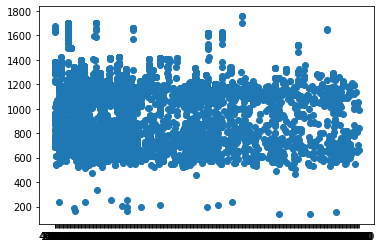

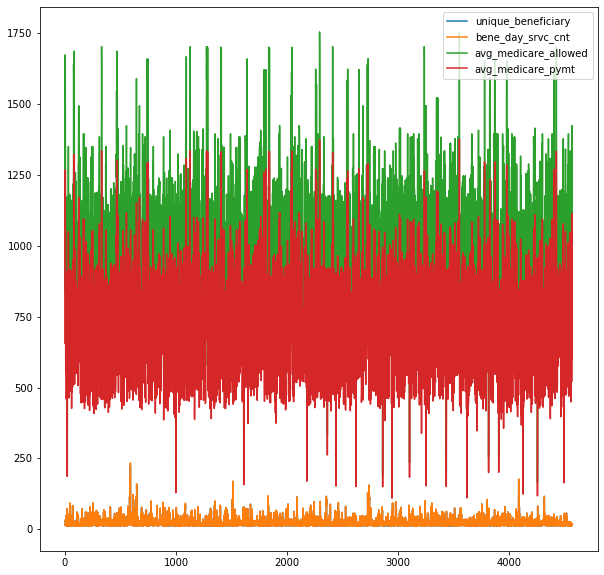

In [84]:
plt.scatter(x='CBSA',y='avg_medicare_allowed',data=physician_5113_CBSA_combined)
#plt.figure(figsize=(10,10))
physician_5113_CBSA_combined.plot(figsize=(10,10))

In [68]:
physician_5113_CBSA_35620.avg_medicare_allowed.agg(['max','min','mean'])

max     1395.640000
min      642.760000
mean    1093.643903
Name: avg_medicare_allowed, dtype: float64

### Find provider/Physicians in CBSA 35620 for APC 5492

In [ ]:
physician_5492 =ASC_crosswalk_combined[(ASC_crosswalk_combined['APC']=='5492')]
physician_5492.shape

In [ ]:
physician_5492_CBSA_35620 = physician_5492[physician_5492.ZIP.isin(cbsa_35620_list)]
physician_5492_CBSA_35620.shape

In [ ]:
physician_5492_CBSA_35620.duplicated()

In [ ]:
physician_5492_CBSA_35620.avg_medicare_allowed.agg(['max','min','mean'])

### Find provider/Physicians in CBSA 35620 for APC 5491

In [ ]:
physician_5491 =ASC_crosswalk_combined[(ASC_crosswalk_combined['APC']=='5491')]
physician_5491.shape

In [ ]:
physician_5491_CBSA_35620 = physician_5491[physician_5491.ZIP.isin(cbsa_35620_list)]
physician_5491_CBSA_35620.shape

In [ ]:
physician_5491_CBSA_35620.avg_medicare_allowed.agg(['max','min','mean'])

In [ ]:
physician_5491_CBSA_35620.HCPCS.unique()

In [ ]:
zip_list_APC5491=(physician_5491['ZIP'].values).tolist()

In [ ]:
CBSA_list =CBSA[CBSA.zip.isin(zip_list_APC5491)]
CBSA_list.info()

In [ ]:
cbsa_10580=ASC_crosswalk_CBSA[(ASC_crosswalk_CBSA['CBSA']=='35620')] # & (ASC_crosswalk_CBSA['APC'] == '5492')]
cbsa_10580.shape
cbsa_10580[cbsa_10580.HCPCS=='0191T']

In [ ]:
list_state = ['']
physician_5491['np_state'].value_counts()

In [ ]:
count =cbsa_10580['APC'].value_counts()

print(count)

### Combined APC 5114, 5113, and 5492

In [ ]:
APCs = ['5113', '5114', '5491','5492']
APCs_combined = ASC_crosswalk_combined[(ASC_crosswalk_combined['APC'].isin(APCs))]# & (ASC_crosswalk_combined['np_state']=='TN')]
                #(ASC_crosswalk_combined['np_state'].isin(ASC_crosswalk_combined['np_state']))]
APCs_combined.shape
APCs_combined.to_csv('Provider_5113_5114_5491_5492_combined.csv', index=False)
                                              

In [ ]:
APCs_combined_CBSA_35620=APCs_combined[APCs_combined.ZIP.isin(cbsa_35620_list)]
APCs_combined_CBSA_35620.to_csv('Provider_5113_5114_5491_5492_combined_CBSA_35620.csv', index=False)